# Lab 5 - Working With HERA Data
#### Aidan Berres
#### Physics 434
#### 11/15/20

In [2]:
from pyuvdata import UVData
import numpy as np
from matplotlib import pyplot as plt

## Introduction
### What is HERA?
The Hydrogen Epoch of Reionization Array or HERA is an array of radio interferometers located in a desert in South Africa. From the HERA website, it describes the array as, “a large grid of 14 meter (42 ft) diameter non-tracking dishes packed into a hexagonal grid 300 m (900ft)  across” (from https://reionization.org/). This array is meant to track large scale HI structures with its large collection range, during the Epoch of Reionization. Specifically, HERA looks at the Neutral Hydrogen 21 cm “spin-flip” transition, where the dipole moments of the proton and electron of neutral hydrogen change direction, thus flipping the spin of the electron. This provides more accurate representations of scale since these waves can penetrate thick cosmic dust clouds that visible light cannot pass through. This is the next step in large scale radio interferometry since it is the successor to the Murchison Widefield Array (MWA) and the Precision Array for Probing the Epoch of Reionization (PAPER), which both helped determined many attributes that went into designing HERA. These include telescope/array design, data collection techniques, and data storage/processing. 

### What is the "Epoch of Reionization" and why is it important to HERA?
The Epoch of Reionization (the ER in HERA) and its aftermath are the main structures HERA is looking for. This is a specific time frame in the evolution of the universe that began around 370 Myr after the Big Bang. At this time large dense reionized materials were separated into “bubble” like structures made up the Intergalactic Medium (IGM). Sometime after this Epoch, these reionized bubble structures start to congeal and begin to form some of the first large-scale cosmic structures we see today. These structures include the first stars, black holes, and galaxies. Thus, HERA is looking at this period of the IGM so we can understand the inner workings of our current universes structures, and how they formed.

### What kind of data does HERA take?
HERA uses an observation technique called Interferometry. This technique uses a telescope array of individual antennae which are connected together. This gives the telescope a large field of view and good resolution. The resolution and field of view can be much higher than a single radio dish telescope since that only represents one large “antenna”, whereas the interferometer array has many antennae each with their own data intake. The antennae of HERA take in data by measuring the electric field and squaring it either with its own data or with another antennas data, giving you what is called a “visibility”. These visibilitys are the measure of the response of a pair of antennae from radiation from the sky for particular colors or frequencies in our case. A pair of antennae readings is called a “Baseline” and unique visibilitys come from each baseline. As mentioned before, there are two visibilitys, one’s is from two different antennae, and the other is from the same antennae, these are called Cross-correlations and Auto-correlations respectively. 

## Exploring the Data
Here we are reading in the data like from the Manual file given.

In [3]:
uv = UVData()
uv.read('hera1.hd5',file_type='uvh5')
data = uv.data_array
print('This data array has shape:')
print('(# baselines*times, # spectral windows, # frequencies, # polarizations)')
print(np.shape(data))

This data array has shape:
(# baselines*times, # spectral windows, # frequencies, # polarizations)
(13320, 1, 1536, 1)


In [78]:
# Look at the antennas that are contained in the array:
print(sorted(uv.antenna_numbers))
# Pick 2 sample antennas, and get data from that baseline. Note that to get the 'auto-correlations', you can do the 
# same thing, but set antenna1 and antenna2 to be the same value.
antenna1 = 140
antenna2 = 23
data = uv.get_data(antenna1,antenna2)

[0, 1, 2, 11, 12, 13, 14, 23, 24, 25, 26, 36, 37, 38, 39, 44, 45, 46, 50, 51, 52, 53, 58, 59, 65, 66, 67, 68, 73, 75, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 98, 99, 100, 101, 102, 103, 104, 105, 107, 108, 109, 110, 111, 112, 116, 117, 118, 119, 120, 121, 122, 123, 124, 127, 128, 129, 130, 135, 136, 137, 138, 140, 141, 142, 143, 144, 145, 155, 156, 157, 158, 160, 161, 162, 163, 164, 165, 166, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187]


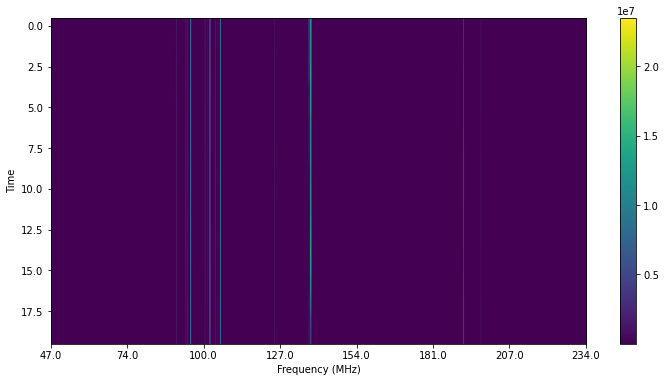

In [280]:
fig, axs = plt.subplots(1,1,figsize=(12,6))
im = plt.imshow(np.abs(data),aspect='auto')
cbar = fig.colorbar(im)
freqs = uv.freq_array[0]*1e-6 #gets frequencies associated with each channel, in MHz
axs.set_ylabel('Time')
axs.set_xlabel('Frequency (MHz)')
xticks = [int(i) for i in np.linspace(0,len(freqs)-1,8)]
_ = axs.set_xticks(xticks)
xticklabels = np.around(freqs[xticks],0)
_ = axs.set_xticklabels(xticklabels)
plt.show()

As we see from this test plot here, that there are little changes with respect to time for this baseline, and we see little changes outside of the main frequencies shown in the plot. We can possibly see more detail if we take the logarithm (of base 10) of our data and then plot it. 

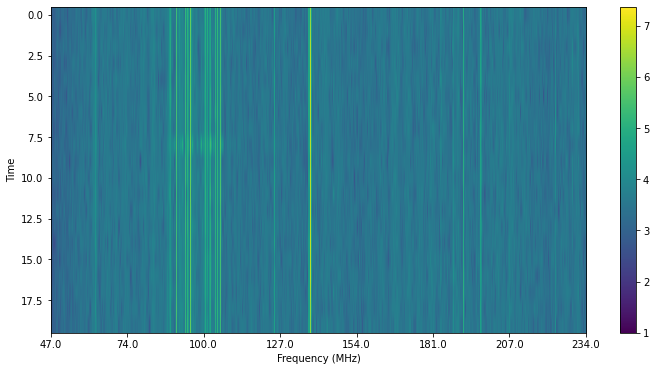

In [279]:
fig, axs = plt.subplots(1,1,figsize=(12,6))
im2 = plt.imshow(np.log10(np.abs(data)),aspect='auto')
cbar = fig.colorbar(im2)
freqs = uv.freq_array[0]*1e-6 #gets frequencies associated with each channel, in MHz
axs.set_ylabel('Time')
axs.set_xlabel('Frequency (MHz)')
xticks = [int(i) for i in np.linspace(0,len(freqs)-1,8)]
_ = axs.set_xticks(xticks)
xticklabels = np.around(freqs[xticks],0)
_ = axs.set_xticklabels(xticklabels)
#plt.xlim(0,234)
plt.show()

We can see here that the background has a range of values from 3 to 4 magnitudes while our main frequencies stay around 6 to 7 magnitudes in strength. We can also see a new line has appeared between the 47 Mhz and 74 Mhz ticks that was not present in the un-logged plot. We can also see a possible non-sky phenomena around the eigth time record, surrounding the 100 Mhz frequency, we will explore this phenomena with more plots later.

## Auto-correlation plot
Since we have seen a plot of a Cross-correlation, why don't we view a plot of an Auto-correlation to find some differences between them. For this I am using a Auto-correlation of antenna number 68.

In [83]:
antenna1 = 68
antenna2 = 68
dc1 = uv.get_data(antenna1,antenna2)

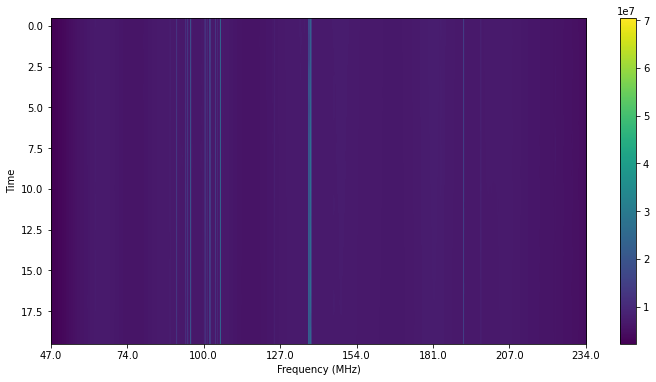

In [281]:
fig, axs = plt.subplots(1,1,figsize=(12,6))
im = plt.imshow(np.abs(dc1),aspect='auto')
cbar = fig.colorbar(im)
freqs = uv.freq_array[0]*1e-6 #gets frequencies associated with each channel, in MHz
axs.set_ylabel('Time')
axs.set_xlabel('Frequency (MHz)')
xticks = [int(i) for i in np.linspace(0,len(freqs)-1,8)]
_ = axs.set_xticks(xticks)
xticklabels = np.around(freqs[xticks],0)
_ = axs.set_xticklabels(xticklabels)
plt.show()

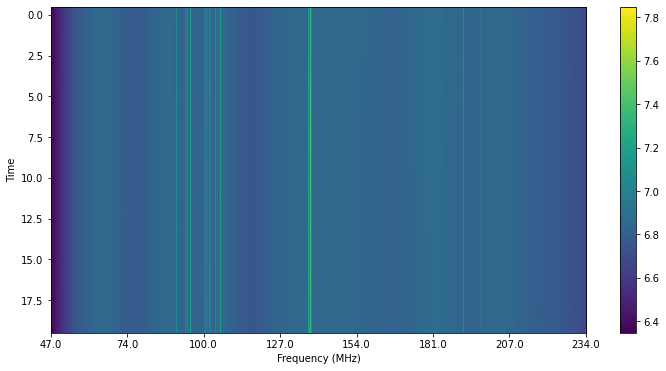

In [282]:
fig, axs = plt.subplots(1,1,figsize=(12,6))
im3 = plt.imshow(np.log10(np.abs(dc1)),aspect='auto')
cbar = fig.colorbar(im3)
freqs = uv.freq_array[0]*1e-6 #gets frequencies associated with each channel, in MHz
axs.set_ylabel('Time')
axs.set_xlabel('Frequency (MHz)')
xticks = [int(i) for i in np.linspace(0,len(freqs)-1,8)]
_ = axs.set_xticks(xticks)
xticklabels = np.around(freqs[xticks],0)
_ = axs.set_xticklabels(xticklabels)
plt.show()

Both these plots share similar features. This includes little variance and similar intensity lines, doesn't seem to show time dependence really well. Furthermore, for the logged plot, we see little variance in the background as with the Cross-correlation logged plot. For this plot we see a very uniform background and no non-sky phenomena as well.

In [17]:
data[0].size

1536

In [18]:
data.shape

(20, 1536)

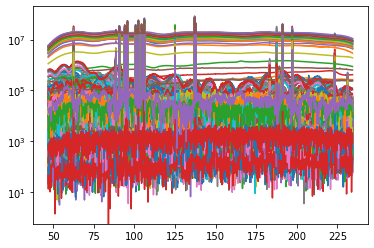

In [22]:
pairs = uv.get_antpairs()
pairs[0][1]
for i in range(666):
    ant1 = pairs[i][0]
    ant2 = pairs[i][1]
    dat = abs(uv.get_data(ant1, ant2))
    plt.yscale('log')
    plt.plot(freqs, dat[19])

In [33]:
ant=sorted(uv.antenna_numbers)
for i in range(len(p)):
    if p[i][0] not in ant or p[i][1] not in ant:
            print('1')

In [43]:
count=0
for i in range(len(ant)):
    for j in range(len(ant)):
        if (ant[i],ant[j]) not in p:
            count = count +1
print(f'There are {count} pairs missing')

There are 10150 pairs missing


In [44]:
len(ant)**2 - count

666

In [52]:
dc1.shape

(20, 1536)

## Looking at non-sky phenomena
We are taking a look at the the change in intensity in the first Cross-correlation of (140,23) plot near the eigth time record. We can compare time slices from before the phenomena (at time = 7) during the phenomena (at time = 8) and after (at time = 9). These plots are logged due to these changes being magnitudes apart from each other.

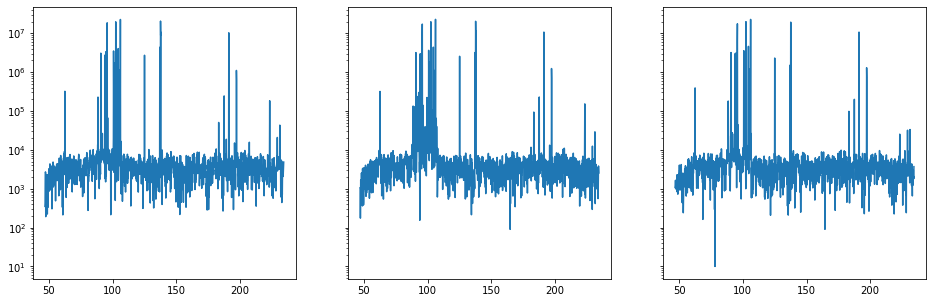

In [230]:
fig,ax=plt.subplots(1,3,figsize=(16,5),sharey=True)
ax[0].set_yscale('log')
ax[0].plot(freqs,np.abs(data[7]))
ax[1].set_yscale('log')
ax[1].plot(freqs,np.abs(data[8]))
ax[2].set_yscale('log')
ax[2].plot(freqs,np.abs(data[9]));

As we can see, the middle plot has a distinct increase in visibility around the 100 Mhz value, similar to the plot shown before. We know that this happens around the time of this record, since we do not see the same features either before or after the eigth recording. EXPLAIN PHENOM

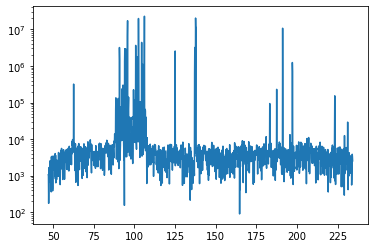

In [207]:
#may remove
plt.yscale('log')
plt.plot(freqs,np.abs(data[8]))

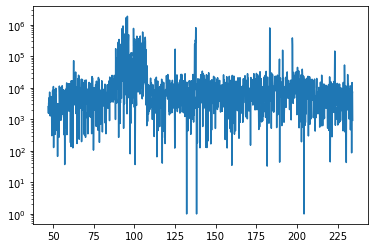

In [102]:
#may remove
plt.yscale('log')
plt.plot(freqs,np.abs(dc1[8]-dc1[7]))

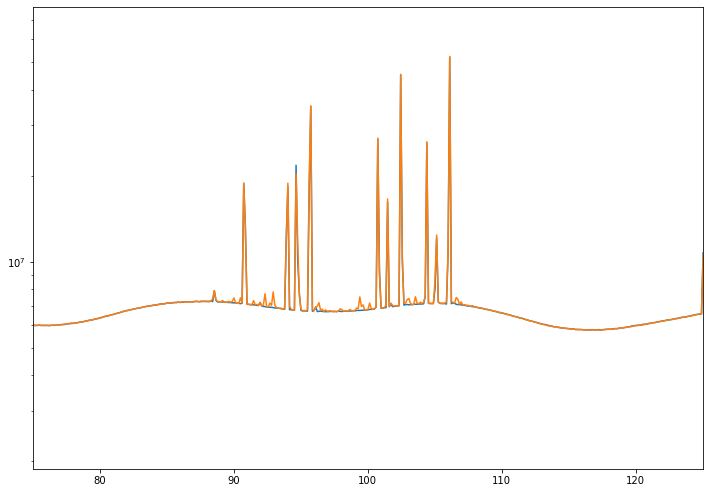

In [123]:
#may remove if i cant explain myself
fig, ax = plt.subplots(1,1,figsize=(12,8.5))
plt.yscale('log')
ax.set_xlim(75,125)
ax.plot(freqs,np.abs(dc1[7]))
ax.plot(freqs,np.abs(dc1[8]))

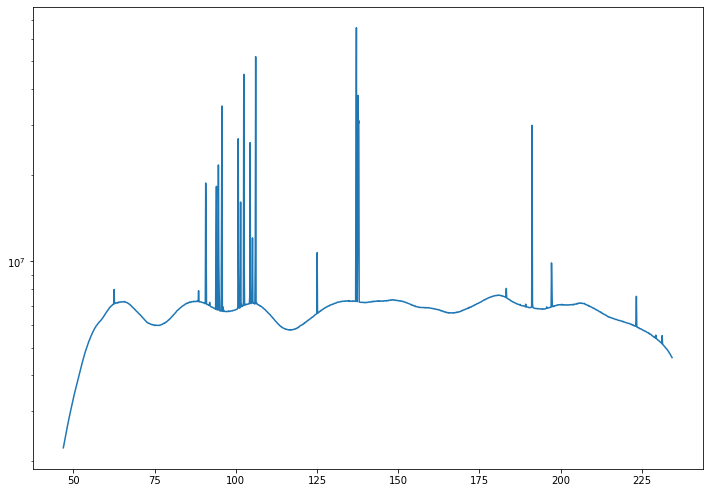

In [148]:
#may remove if i cant explain myself
fig, ax = plt.subplots(1,1,figsize=(12,8.5))
plt.yscale('log')
#ax.set_xlim(75,125)
ax.plot(freqs,np.abs(dc1[7]))

## Do something with these *plots*

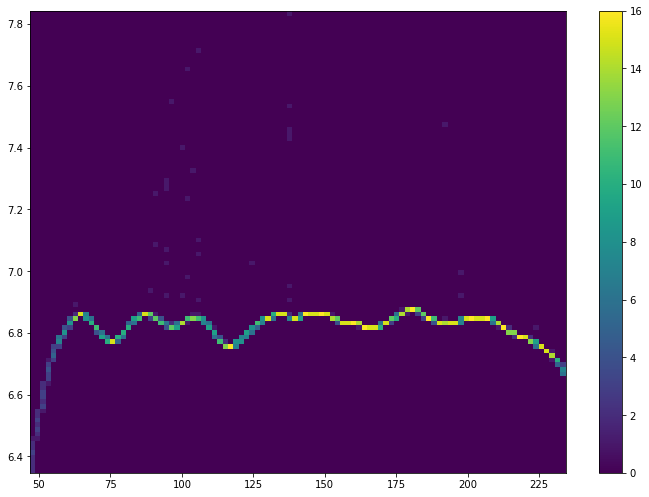

In [202]:
fig, ax = plt.subplots(1,1,figsize=(12,8.5))
for i in range(20):
    plt.hist2d(freqs,np.log10(np.abs(dc1[i])), bins = 100)
#plt.yscale('log')
plt.colorbar()
plt.show()

(122, 36)


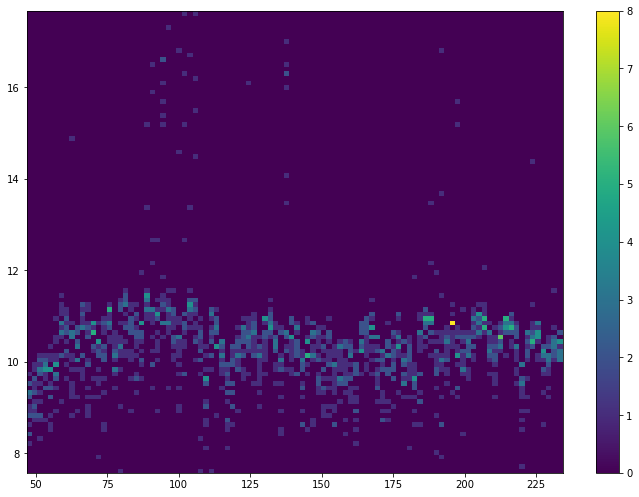

In [146]:
fig, ax = plt.subplots(1,1,figsize=(12,8.5))
ran=np.random.randint(0,len(p))
pr=p[ran]
dat = uv.get_data(pr)
print(pr)
for i in range(20):
    plt.hist2d(freqs,np.log(np.abs(dat[i])), bins = 100)
#plt.yscale('log')
plt.colorbar();

In [130]:
ran=np.random.randint(0,len(p))
p[ran]

(124, 50)

In [200]:
ran=np.random.randint(0,len(p))
pr=p[ran]
dat = uv.get_data(pr)
np.imag(dat)

array([[ -93.,  -98.,  -14., ..., 1245., -582., -344.],
       [-503.,  518., -207., ..., -147.,   72., -274.],
       [-147.,  511.,  572., ..., -283., 1730.,  240.],
       ...,
       [-476., -802.,  211., ...,  604.,  443.,   81.],
       [-104.,   84.,  529., ..., -991., -240.,  824.],
       [-387., -531.,   23., ..., -488., 1122.,  447.]])

## Working with Baselines in this dataset
We can use `uv.get_antpairs()` to find all the baselines in our dataset that contain data. This shows that all the antennae listed before cannot be analyzed since there is no data for them.

In [21]:
p=uv.get_antpairs()
len(p)

666

In [201]:
666*20

13320

We find there are 666 baselines in our dataset. This explains the `baselines*times` shape parameter in our dataset, since we have 666 baselines and we have only 20 "times" per baseline, we just multiply 666 * 20 = 13320, thus our shape.

## Looking at valid Baselines
Here we can look at a baseline chosen randomly from the set of baselines the data contains.

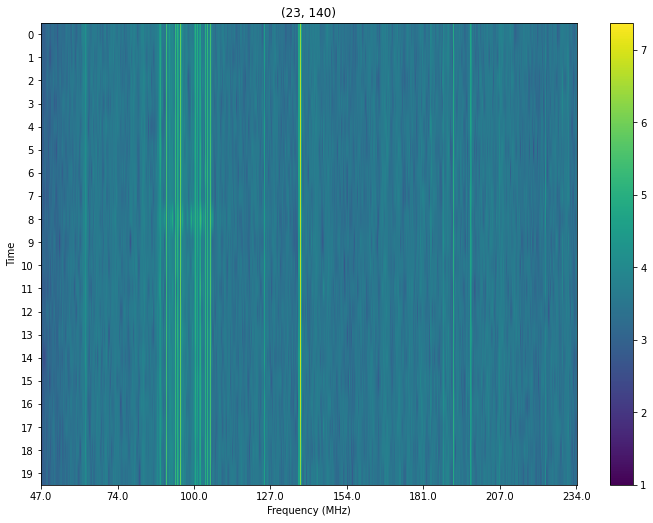

In [231]:
fig, axs = plt.subplots(1,1,figsize=(12,8.5))
ran=np.random.randint(0,len(p))
pr=p[ran]
dat = uv.get_data(pr)
plt.title(pr)
im2 = plt.imshow(np.log10(np.abs(dat)),aspect='auto')
cbar = fig.colorbar(im2)
freqs = uv.freq_array[0]*1e-6 #gets frequencies associated with each channel, in MHz
axs.set_ylabel('Time')
axs.set_xlabel('Frequency (MHz)')
xticks = [int(i) for i in np.linspace(0,len(freqs)-1,8)]
_ = axs.set_xticks(xticks)
xticklabels = np.around(freqs[xticks],0)
_ = axs.set_xticklabels(xticklabels)
axs.set_yticks(np.arange(20))
#plt.grid(axis='y')
plt.show()

## Diagnosing problems with antennae
We can see that Auto-correlations don't give us a lot of scientific information, since it is only coming from one antenna, and not spread out like a Cross-correlation. What Auto-correlations can do is diagnose issues with individual antennae, since it only contains visibility data from said antenna. Thus we can search for all the Auto-correlations in our list of baselines. 

In [233]:
sa=[]
for i in range(len(p)):
    if p[i][0]==p[i][1]:
        sa.append(p[i])
len(sa)

36

We have 36 valid Auto-correlations in our dataset, we can see a plot of a possibly malfunctioning antennae below.

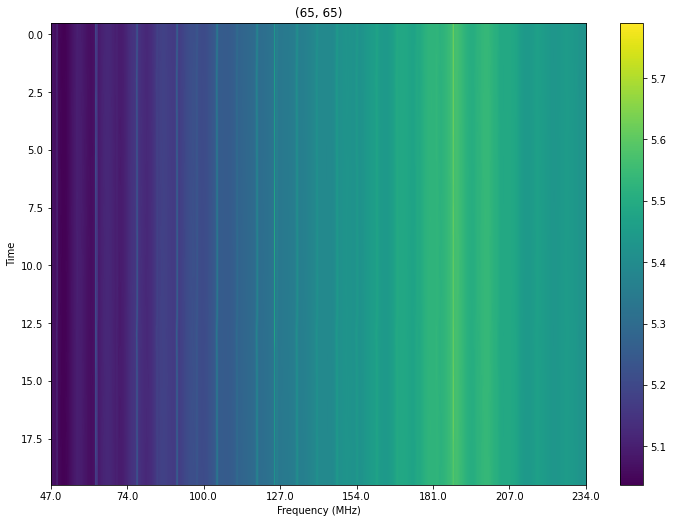

In [273]:
fig, axs = plt.subplots(1,1,figsize=(12,8.5))
pr=sa[10]
dat = uv.get_data(pr)
plt.title(pr)
im2 = plt.imshow(np.log10(np.abs(dat)),aspect='auto')
cbar = fig.colorbar(im2)
freqs = uv.freq_array[0]*1e-6 #gets frequencies associated with each channel, in MHz
axs.set_ylabel('Time')
axs.set_xlabel('Frequency (MHz)')
xticks = [int(i) for i in np.linspace(0,len(freqs)-1,8)]
_ = axs.set_xticks(xticks)
xticklabels = np.around(freqs[xticks],0)
_ = axs.set_xticklabels(xticklabels)
#axs.set_yticks(np.arange(20))
#plt.grid(axis='y')
plt.show()

Compared to the earlier Auto-correlation and Cross-correlation plots, there are many more frequency signals than either plot. We can also see that the visibility increases around 190 Mhz in the background and in the signal. Furthermore, the color bar shows little variance in our data, whereas our other plots are going from 6 to 7, we see in this plot it only contains values of magnitude 5, going from 5.1 to around 5.8, which is a small variance.

Since we have a relatively small list of Auto-correlations, we can make a plot of all of them simultaneously to identify any outliers that may be off. For the plots I am plotting visibiities vs. frequency at the tenth time slice for every Auto-correlation.

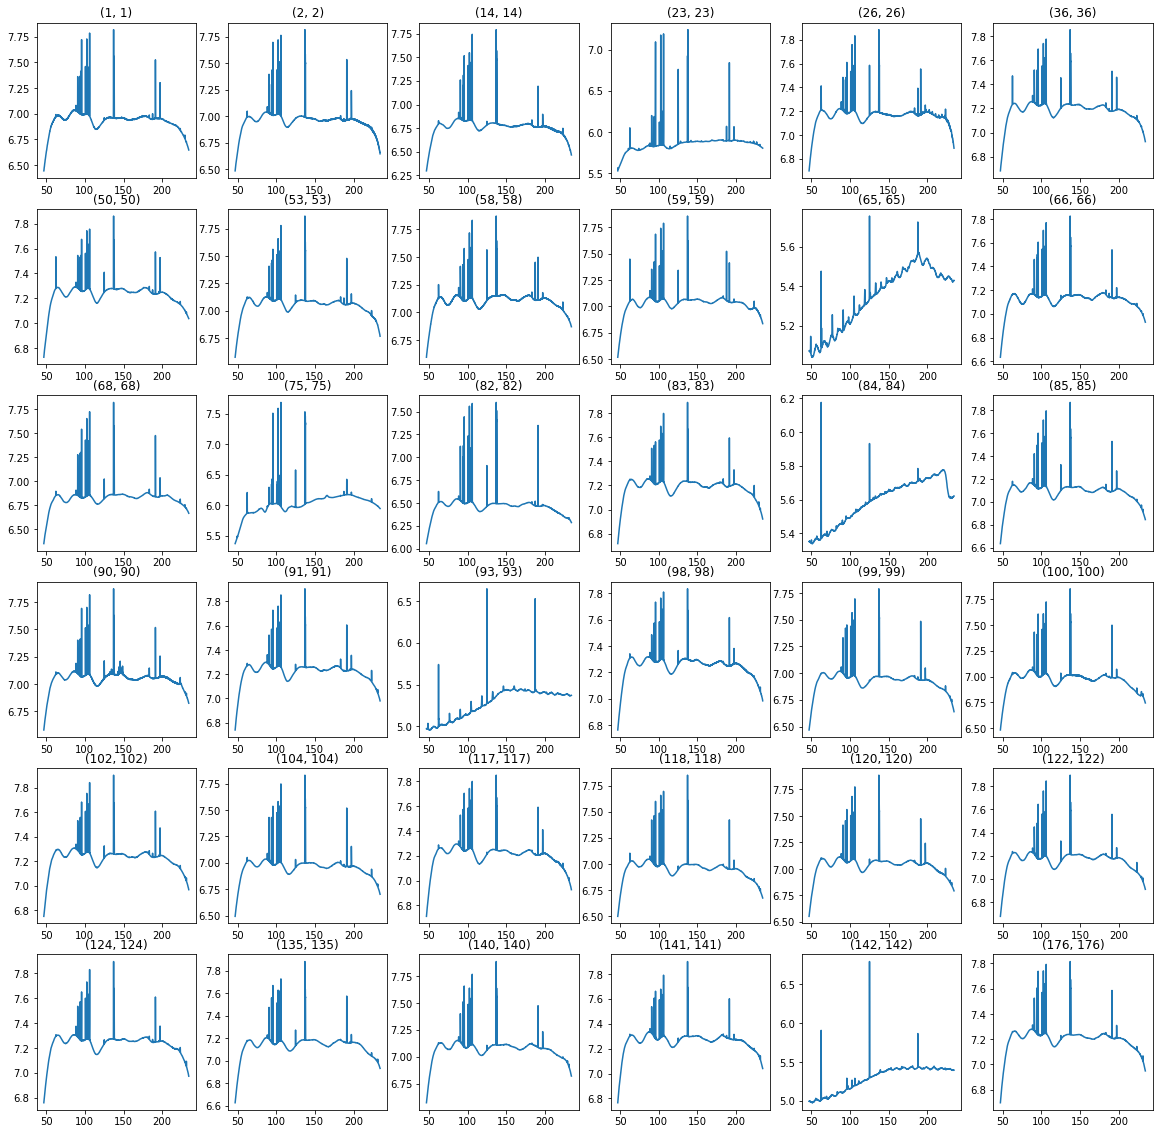

In [252]:
fig,ax=plt.subplots(6,6,figsize=(20,20))
ax=ax.flatten()
for i in range(36):
    pr=sa[i]
    dat = uv.get_data(pr)
    ax[i].set_title(pr)
    ax[i].plot(freqs,np.log10(abs(dat[10])))

We can see at the baselines of (65, 65), (84, 84), (93, 93), and (142, 142) that they have abnormal plots. Not only do they not follow the background, they also not in the 7 - 7.2 range but are shifted down to around 5. They show an increase in visibility as the frequency increases usually. They also only have 3 prominent visibilitys at certain frequencies, rather than a spectrum of visibilities like the regular antennae. ADD MORE

In [236]:
sa

[(1, 1),
 (2, 2),
 (14, 14),
 (23, 23),
 (26, 26),
 (36, 36),
 (50, 50),
 (53, 53),
 (58, 58),
 (59, 59),
 (65, 65),
 (66, 66),
 (68, 68),
 (75, 75),
 (82, 82),
 (83, 83),
 (84, 84),
 (85, 85),
 (90, 90),
 (91, 91),
 (93, 93),
 (98, 98),
 (99, 99),
 (100, 100),
 (102, 102),
 (104, 104),
 (117, 117),
 (118, 118),
 (120, 120),
 (122, 122),
 (124, 124),
 (135, 135),
 (140, 140),
 (141, 141),
 (142, 142),
 (176, 176)]

## Testing some things


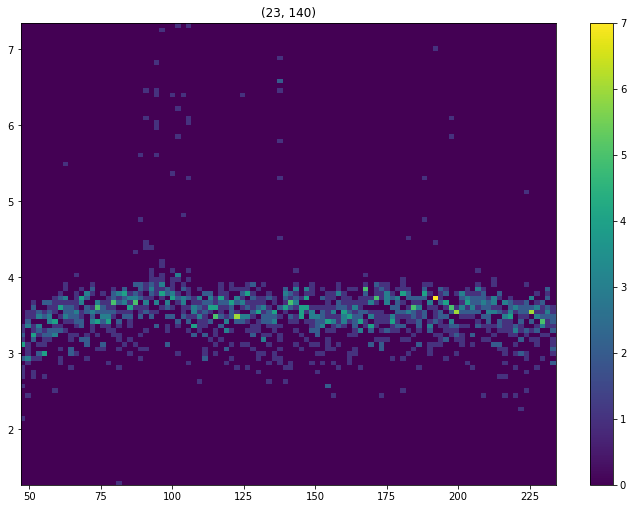

In [267]:
fig, ax = plt.subplots(1,1,figsize=(12,8.5))
ran=np.random.randint(0,len(p))
pr=(23,140)
dat = uv.get_data(pr)
plt.title(pr)
for i in range(20):
    plt.hist2d(freqs,np.log10(np.abs(dat[i])), bins = 100)
#plt.yscale('log')
plt.colorbar();

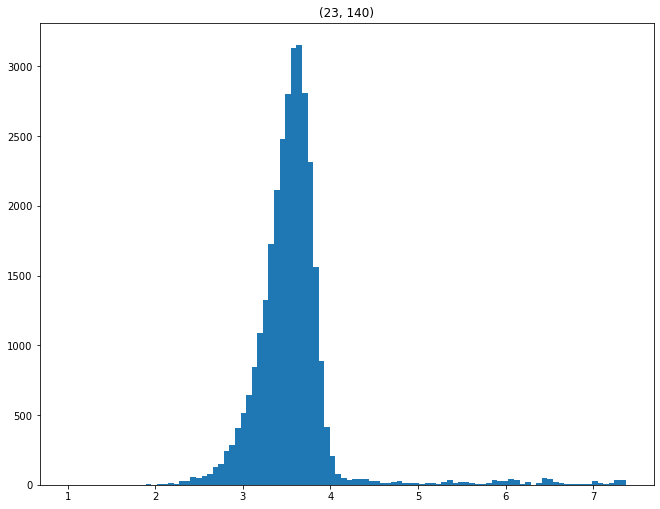

In [272]:
fig, axs = plt.subplots(1,1,figsize=(11,8.5))
pr=(23,140)
dat1=uv.get_data(pr)
dat1f=dat1.flatten()
#plt.yscale('log')
plt.title(pr)
plt.hist(np.log10(abs(dat1f)),bins=100);